In [1]:
import numpy as np
# import cv2
import tifffile as tiff
from shapely.geometry import Polygon, mapping, shape, box
from skimage import io
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
# import json
from rasterio import features
import scanpy as sc
import pandas as pd
import geopandas as gpd

from adjustText import adjust_text

from matplotlib import colors

import pickle
import scipy

import seaborn as sns

from SGanalysis.SGobject import SGobject 

import matplotlib
%matplotlib inline
# matplotlib.use('Qt5Agg')
# %matplotlib qt

from sklearn.cluster import AgglomerativeClustering as AggCluster

import sys
import os

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# tools_path  = '/Users/grantkinsler/Documents/Penn/Research/SpatialBarcodes/SpatialBarcodes/analysis/tools/tools.py'

tools_path  = '/Users/grantkinsler/Documents/Penn/Research/SpatialBarcodes/analysis/tools/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools as tools

In [2]:
roi_file_paths = {
    # 'roi_1':{'segmentation_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-05-21_mouseexp_expression/projects/roi_1/segmentations/nuclei_20240604_nuclei.tiff',
    #                        'spots_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-05-21_mouseexp_expression/projects/roi_1/exports/decode_20240604.csv',
    #                         'out_path':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-05-21_mouseexp_expression/projects/roi_1/exports'
    #                        },
    #               'roi_2':{'segmentation_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-05-21_mouseexp_expression/projects/roi_2/segmentations/nuclei_20240529_nuclei.tiff',
    #                        'spots_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-05-21_mouseexp_expression/projects/roi_2/exports/decode_20240604.csv',
    #                         'out_path':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-05-21_mouseexp_expression/projects/roi_2/exports'
    #                        },
    #               'roi_3':{'segmentation_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-05-21_mouseexp_expression/projects/roi_3/segmentations/nuclei_20240604_nuclei.tiff',
    #                        'spots_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-05-21_mouseexp_expression/projects/roi_3/exports/decode_20240604.csv',
    #                         'out_path':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-05-21_mouseexp_expression/projects/roi_3/exports'
    #                        },
                #   'timezero':{'segmentation_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-04-27_spatialbarcodes_SG_expression_mouse_exp/time_zero_output/roi1/segmentations/segmentation_20240513_nuclei.tiff',
                #               # 'spots_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-04-27_spatialbarcodes_SG_expression_mouse_exp/time_zero_output/roi1/genes/matrix_20240517_segmentation_segmentation_20240513_cells.csv',
                #               'spots_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-04-27_spatialbarcodes_SG_expression_mouse_exp/time_zero_output/roi1/transcripts/20240517_segmentation_withRefid.csv',
                #               'out_path':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-04-27_spatialbarcodes_SG_expression_mouse_exp/time_zero_output/roi1/exports'
                #               },

                    #  'run2_roi_1':{'segmentation_file':'/media/wniu/GRK_003/2024-08-08_spatialbarcode_tumor2_projects/roi_1/exports/segmentation.tiff',
                    #           'spots_file':'/media/wniu/GRK_003/2024-08-08_spatialbarcode_tumor2_projects/roi_1/exports/transcripts.csv',
                    #            'out_path':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-08-08_spatialbarcode_tumor2_projects/roi_1/exports/',
                    #             },
                   'run2_roi_2':{'segmentation_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-08-08_spatialbarcode_tumor2_projects/roi_2/exports/segmentation.tiff',
                               'spots_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-08-08_spatialbarcode_tumor2_projects/roi_2/exports/transcripts.csv',
                               'out_path':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-08-08_spatialbarcode_tumor2_projects/roi_2/exports/',
                               },
#                    'run2_roi_3':{'segmentation_file':'/media/wniu/GRK_003/2024-08-08_spatialbarcode_tumor2_projects/roi_3/exports/segmentation.tiff',
#                                'spots_file':'/media/wniu/GRK_003/2024-08-08_spatialbarcode_tumor2_projects/roi_3/exports/transcripts.csv',
#                                'out_path':'/media/wniu/GRK_003/2024-08-08_spatialbarcode_tumor2_projects/roi_3/exports/',
#                                },
                                
                                


        
                    # 'dish_roi2':{'segmentation_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-04-27_spatialbarcodes_SG_expression_mouse_exp/time_zero_output/roi1/segmentations/segmentation_20240513_nuclei.tiff',
                    #           # 'spots_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-04-27_spatialbarcodes_SG_expression_mouse_exp/time_zero_output/roi1/genes/matrix_20240517_segmentation_segmentation_20240513_cells.csv',
                    #           'spots_file':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-04-27_spatialbarcodes_SG_expression_mouse_exp/time_zero_output/roi1/transcripts/20240517_segmentation_withRefid.csv',
                    #           'out_path':'/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/2024-04-27_spatialbarcodes_SG_expression_mouse_exp/time_zero_output/roi1/exports'
                    #           },
                  
                  }

In [3]:
# locations = pd.read_csv(f'{filepath}{roi_name}/exports/cell_attributes_cell_10px_20240605.csv',index_col=0)
# matrix = pd.read_csv(f'{filepath}{roi_name}/exports/cell_by_gene_matrix_20240606_10px_cell.csv',index_col=0)

# matrix.set_index(matrix.index.astype(str),inplace=True)
# locations.set_index(matrix.index.astype(str),inplace=True)

roi_name = 'run2_roi_2'

# /Volumes/GRK_001/spatialbarcodes/2024-05-21_mouseexp_expression/projects/roi2/exports/
with open(f'{roi_file_paths[roi_name]["out_path"]}/sg_object_dilate10_20240718.pkl', 'rb') as f:
    sg_obj = pickle.load(f)


In [4]:
unclustered_df =  pd.read_csv(f'{roi_file_paths[roi_name]["out_path"]}/cell_by_gene_matrix_dilate10_20240718_withbarcodes_atleast3.csv')

clustered_df = pd.read_csv(f'{roi_file_paths[roi_name]["out_path"]}/cell_by_gene_matrix_dilate10_20240718_withbarcodes_clustering_10bcs_0.4thresh.csv')

In [7]:
df = unclustered_df.merge(clustered_df[['cell_id','bc_cluster','bc_cluster_n_bcs','bc_cluster_found_bcs','bc_cluster_bc_names']],on='object_id',how='left')   

In [14]:
df['cell_id'] = [str(id) for id in df['object_id']]

In [16]:
sg_obj.gdf['cell_id'] = [str(x) for x in sg_obj.gdf['object_id']]
sg_obj.gdf = sg_obj.gdf.sort_values('object_id')

# assign clusteres to the sg_obj
sg_obj.gdf = sg_obj.gdf.merge(df[['cell_id']+list(df.columns.difference(sg_obj.gdf.columns))],on=['cell_id'],how='left')


In [31]:
df.index = [str(x) for x in df.index]

In [18]:
sg_obj.gdf[sg_obj.gdf['bc_cluster']==120]

,object_id,nucleus,nucleus_dilated,cell_id,AKT1,AXL,BGN,BIRC3,BIRC5,BMP2,...,bc_096,bc_cluster,bc_cluster_bc_names,bc_cluster_found_bcs,bc_cluster_n_bcs,called_barcodes,center_x,center_y,n_called_barcodes,nucleus_centroid
21895,29704,"POLYGON ((41113.000 18430.000, 41086.000 18442...","POLYGON ((41113.830 18420.035, 41112.829 18420...",29704,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,120.0,bc_074-bc_095,"['bc_074', 'bc_095']",2.0,"['bc_074', 'bc_095']",41098.110239,18484.684506,2.0,POINT (41098.11023918935 18484.684505714624)
22344,30107,"POLYGON ((42467.000 18566.000, 42453.000 18571...","POLYGON ((42468.168 18556.068, 42467.251 18556...",30107,2.0,0.0,0.0,0.0,1.0,0.0,...,0.0,120.0,bc_074-bc_095,"['bc_074', 'bc_095']",2.0,"['bc_074', 'bc_095']",42436.437374,18605.895009,2.0,POINT (42436.43737408294 18605.895008932985)
25287,32757,"POLYGON ((40971.000 19494.000, 40957.000 19497...","POLYGON ((40923.064 19554.954, 40929.881 19570...",32757,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,120.0,bc_074-bc_095,"['bc_074', 'bc_095']",2.0,"['bc_074', 'bc_095']",40979.528588,19534.728463,2.0,POINT (40979.528587711124 19534.72846337167)
25355,32818,"POLYGON ((40915.000 19510.000, 40907.000 19512...","POLYGON ((40849.000 19559.980, 40849.000 19569...",32818,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,120.0,bc_074-bc_095,"['bc_074', 'bc_095']",2.0,"['bc_060', 'bc_074', 'bc_091', 'bc_095']",40892.753682,19558.453825,4.0,POINT (40892.7536819958 19558.453824767057)
25578,33018,"POLYGON ((40829.000 19590.000, 40823.000 19595...","POLYGON ((40830.104 19580.061, 40829.100 19580...",33018,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,120.0,bc_074-bc_095,"['bc_074', 'bc_095']",2.0,"['bc_074', 'bc_091', 'bc_095']",40852.599978,19633.692009,3.0,POINT (40852.59997815282 19633.692009394286)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56398,60757,"POLYGON ((46002.000 31381.000, 45991.000 31385...","POLYGON ((46005.304 31371.561, 46004.365 31371...",60757,10.0,0.0,0.0,1.0,3.0,0.0,...,0.0,120.0,bc_074-bc_095,"['bc_074', 'bc_095']",2.0,"['bc_001', 'bc_027', 'bc_074', 'bc_095']",46010.782698,31453.390161,4.0,POINT (46010.78269778237 31453.390161199663)
56811,61128,"POLYGON ((46738.000 31637.000, 46723.000 31642...","POLYGON ((46687.818 31641.047, 46687.763 31641...",61128,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,120.0,bc_074-bc_095,"['bc_074', 'bc_095']",2.0,"['bc_060', 'bc_074', 'bc_095']",46719.235429,31661.472554,3.0,POINT (46719.235428655746 31661.472554227534)
57087,61377,"POLYGON ((46583.000 31841.000, 46578.000 31843...","POLYGON ((46576.787 31906.118, 46576.764 31906...",61377,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,120.0,bc_074-bc_095,"['bc_074', 'bc_095']",2.0,"['bc_060', 'bc_074', 'bc_095']",46604.730178,31881.261933,3.0,POINT (46604.730177724596 31881.261933253558)
57443,61698,"POLYGON ((46753.000 32104.000, 46740.000 32106...","POLYGON ((46706.442 32154.464, 46706.288 32154...",61698,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,120.0,bc_074-bc_095,"['bc_074', 'bc_095']",2.0,"['bc_060', 'bc_074', 'bc_095']",46755.177155,32148.815038,3.0,POINT (46755.17715453693 32148.815038198634)


In [45]:
# gene_cols = 

gene_cols = [col for col in unclustered_df.columns if 'bc_' not in col and col not in ['object_id','cell_id','called_barcodes','n_called_barcodes','barcode_names','area','center_x','center_y','nucleus','nucleus_centroid','nucleus_dilated']]    

In [46]:
df = df.set_index('cell_id')

KeyError: "None of ['cell_id'] are in the columns"

In [47]:
adata_genes = sc.AnnData(df[gene_cols])

cols= ['cell_id','n_called_barcodes','barcode_names','called_barcodes','area','center_x','center_y','bc_cluster','bc_cluster_n_bcs','bc_cluster_found_bcs','bc_cluster_bc_names']
# for col in :
#     adata_genes.obs[col] = df[col]

adata_genes.obs = df[cols]

/var/folders/9y/6d7h4kvn6f989_h_gypc_j_00000gn/T/ipykernel_87376/3538923659.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_genes = sc.AnnData(df[gene_cols])


In [48]:
min_area = 2000

adata_genes = adata_genes[adata_genes.obs['area']>min_area]

In [49]:
# filter cells and genes by number of occurences 
sc.pp.filter_cells(adata_genes, min_genes=15) # keep only cells that have at least 10 genes
sc.pp.filter_genes(adata_genes, min_cells=500) # keep only genes that are expressed in at least 500 cells

/Users/grantkinsler/miniforge3/envs/spatialgenomics-env2/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


In [51]:
adata_genes

AnnData object with n_obs × n_vars = 59803 × 113
    obs: 'n_called_barcodes', 'barcode_names', 'called_barcodes', 'area', 'center_x', 'center_y', 'bc_cluster', 'bc_cluster_n_bcs', 'bc_cluster_found_bcs', 'bc_cluster_bc_names', 'n_genes'
    var: 'n_cells'

In [31]:
adata_genes.obs['bc_cluster']

0        690.0
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
74816     46.0
74817      NaN
74818     68.0
74819      NaN
74820      NaN
Name: bc_cluster, Length: 74821, dtype: float64

In [32]:
# filter clustered_df to only include cells in adata_genes
clustered_df = clustered_df[clustered_df['cell_id'].isin(adata_genes.obs['cell_id'])]

# sort clustered_df to match adata_genes
clustered_df = clustered_df.sort_values(by='cell_id')   

# assign bc_cluster to adata based on clustered_df, checking that object id is the same
# adata_genes.obs['bc_cluster'] = clustered_df['bc_cluster'].values
# adata_genes.obs['bc_cluster_n_bcs'] = clustered_df['bc_cluster_n_bcs'].values
# adata_genes.obs['bc_cluster_found_bcs'] = clustered_df['bc_cluster_found_bcs'].values
# adata_genes.obs['bc_cluster_bc_names'] = clustered_df['bc_cluster_bc_names'].values


In [33]:
sg_obj.gdf['cell_id']

0            1
1           10
2          100
3         1000
4        10000
         ...  
79141     9995
79142     9996
79143     9997
79144     9998
79145     9999
Name: cell_id, Length: 79146, dtype: object

/Users/grantkinsler/miniforge3/envs/spatialgenomics-env2/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


<AxesSubplot: >

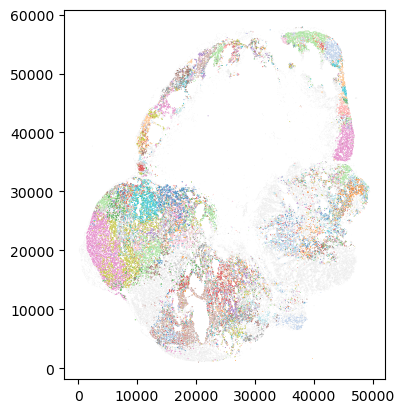

In [34]:
sg_obj.gdf['bc_cluster_not_nan'] = [cluster if not np.isnan(cluster) else 9999999 for cluster in sg_obj.gdf['bc_cluster'] ] 

color_dict = {}
for c,cluster in enumerate(np.unique(sg_obj.gdf['bc_cluster_not_nan'])):

    color_dict[cluster] = sns.color_palette('tab20',n_colors=len(np.unique(sg_obj.gdf['bc_cluster_not_nan'])))[c]
color_dict[9999999] = (0.5,0.5,0.5,0.1)
color_list = [color_dict[cluster] for cluster in sg_obj.gdf['bc_cluster_not_nan']]

sg_obj.gdf.plot(color=color_list)

In [35]:
def grouped_obs_mean(adata, group_key, layer=None, gene_symbols=None):
    if layer is not None:
        getX = lambda x: x.layers[layer]
    else:
        getX = lambda x: x.X
    if gene_symbols is not None:
        new_idx = adata.var[idx]
    else:
        new_idx = adata.var_names

    grouped = adata.obs.groupby(group_key)
    out = pd.DataFrame(
        np.zeros((adata.shape[1], len(grouped)), dtype=np.float64),
        columns=list(grouped.groups.keys()),
        index=adata.var_names
    )

    for group, idx in grouped.indices.items():
        X = getX(adata[idx])
        out[group] = np.ravel(X.mean(axis=0, dtype=np.float64)).tolist()

    # print(out)
    return out

def grouped_obs_sum_squares(adata, group_key, layer=None, gene_symbols=None):
    if layer is not None:
        getX = lambda x: x.layers[layer]
    else:
        getX = lambda x: x.X
    if gene_symbols is not None:
        new_idx = adata.var[idx]
    else:
        new_idx = adata.var_names

    grouped = adata.obs.groupby(group_key)
    out = pd.DataFrame(
        np.zeros((adata.shape[1], len(grouped)), dtype=np.float64),
        columns=list(grouped.groups.keys()),
        index=adata.var_names
    )

    # print(out)

    for group, idx in grouped.indices.items():
        X = getX(adata[idx])
        out[group] = np.ravel(np.square(X).mean(axis=0, dtype=np.float64)).tolist()

    # print(out)
    return out

def grouped_obs_fraction(adata, group_key, layer=None, gene_symbols=None):
    if layer is not None:
        getX = lambda x: x.layers[layer]
    else:
        getX = lambda x: x.X
    if gene_symbols is not None:
        new_idx = adata.var[idx]
    else:
        new_idx = adata.var_names

    grouped = adata.obs.groupby(group_key)
    out = pd.DataFrame(
        np.zeros((adata.shape[1], len(grouped)), dtype=np.float64),
        columns=list(grouped.groups.keys()),
        index=adata.var_names
    )

    # print(out)

    for group, idx in grouped.indices.items():
        X = getX(adata[idx])
        out[group] = np.ravel(np.count_nonzero(X,axis=0)/X.shape[0]).tolist()

    # print(out)
    return out

def grouped_obs_fraction_cutoff(adata, group_key,cutoff = 1, layer=None, gene_symbols=None):
    if layer is not None:
        getX = lambda x: x.layers[layer]
    else:
        getX = lambda x: x.X
    if gene_symbols is not None:
        new_idx = adata.var[idx]
    else:
        new_idx = adata.var_names

    grouped = adata.obs.groupby(group_key)
    out = pd.DataFrame(
        np.zeros((adata.shape[1], len(grouped)), dtype=np.float64),
        columns=list(grouped.groups.keys()),
        index=adata.var_names
    )

    # print(out)

    for group, idx in grouped.indices.items():
        X = getX(adata[idx])
        out[group] = np.ravel(np.sum(X>=cutoff,axis=0)/X.shape[0]).tolist()

    # print(out)
    return out

def grouped_obs_fraction_quantile(adata, group_key,q=0.9, layer=None, gene_symbols=None):
# def grouped_obs_fraction_quantile(adata, group_key,q=0.5, layer=None, gene_symbols=None):
    if layer is not None:
        getX = lambda x: x.layers[layer]
    else:
        getX = lambda x: x.X
    if gene_symbols is not None:
        new_idx = adata.var[idx]
    else:
        new_idx = adata.var_names

    grouped = adata.obs.groupby(group_key)
    out = pd.DataFrame(
        np.zeros((adata.shape[1], len(grouped)), dtype=np.float64),
        columns=list(grouped.groups.keys()),
        index=adata.var_names
    )

    # print(out)

    for group, idx in grouped.indices.items():
        X = getX(adata[idx])
        out[group] = np.ravel(np.sum(X>=np.quantile(getX(adata),q=q,axis=0),axis=0)/X.shape[0]).tolist()

    # print(out)
    return out

def grouped_obs_median(adata, group_key, layer=None, gene_symbols=None):
    if layer is not None:
        getX = lambda x: x.layers[layer]
    else:
        getX = lambda x: x.X
    if gene_symbols is not None:
        new_idx = adata.var[idx]
    else:
        new_idx = adata.var_names

    grouped = adata.obs.groupby(group_key)
    out = pd.DataFrame(
        np.zeros((adata.shape[1], len(grouped)), dtype=np.float64),
        columns=list(grouped.groups.keys()),
        index=adata.var_names
    )

    # print(out)

    for group, idx in grouped.indices.items():
        X = getX(adata[idx])
        out[group] = np.ravel(np.median(X,axis=0)).tolist()

    # print(out)
    return out


def grouped_obs_ttest(adata, group_key, layer=None, gene_symbols=None):
    if layer is not None:
        getX = lambda x: x.layers[layer]
    else:
        getX = lambda x: x.X
    if gene_symbols is not None:
        new_idx = adata.var[idx]
    else:
        new_idx = adata.var_names

    grouped = adata.obs.groupby(group_key)
    out = pd.DataFrame(
        np.zeros((adata.shape[1], len(grouped)), dtype=np.float64),
        columns=list(grouped.groups.keys()),
        index=adata.var_names
    )
    out_p = pd.DataFrame(
        np.zeros((adata.shape[1], len(grouped)), dtype=np.float64),
        columns=list(grouped.groups.keys()),
        index=adata.var_names
    )

    # print(out)

    all_X = getX(adata)

    for group, idx in grouped.indices.items():
        X = getX(adata[idx])

        X = getX(adata[idx])
        t = scipy.stats.ttest_ind(confident_clusters[idx].X,confident_clusters.X,equal_var=False)
        # print(t.statistic.shape)
        out[group] = t.statistic

        # out[group] = np.ravel(np.median(X,axis=0)).tolist()

    # print(out)
    return out

In [1]:
print('ah')

ah


In [ ]:
def grouped_obs_mean(adata, group_key, layer=None, gene_symbols=None):
    if layer is not None:
        getX = lambda x: x.layers[layer]
    else:
        getX = lambda x: x.X
    if gene_symbols is not None:
        new_idx = adata.var[idx]
    else:
        new_idx = adata.var_names

    grouped = adata.obs.groupby(group_key)
    out = pd.DataFrame(
        np.zeros((adata.shape[1], len(grouped)), dtype=np.float64),
        columns=list(grouped.groups.keys()),
        index=adata.var_names
    )

    for group, idx in grouped.indices.items():
        X = getX(adata[idx])
        out[group] = np.ravel(X.mean(axis=0, dtype=np.float64)).tolist()

    # print(out)
    return out

In [ ]:
def calculate_score(adata,group_key):

    




In [36]:
def grouped_obs_ttest_big(adata, group_key, layer=None, gene_symbols=None):
    if layer is not None:
        getX = lambda x: x.layers[layer]
    else:
        getX = lambda x: x.X
    if gene_symbols is not None:
        new_idx = adata.var[idx]
    else:
        new_idx = adata.var_names

    grouped = adata.obs.groupby(group_key)
    out = pd.DataFrame(
        np.zeros((adata.shape[1], len(grouped)), dtype=np.float64),
        columns=list(grouped.groups.keys()),
        index=adata.var_names
    )
    out_p = pd.DataFrame(
        np.zeros((adata.shape[1], len(grouped)), dtype=np.float64),
        columns=list(grouped.groups.keys()),
        index=adata.var_names
    )

    # print(out)

    all_X = getX(adata)

    for group, idx in grouped.indices.items():
        X = getX(adata[idx])

        X = getX(adata[idx])
        t = scipy.stats.ttest_ind(confident_clusters[idx].X,confident_clusters.X,equal_var=False)
        # print(t.statistic.shape)
        out[group] = t.statistic
        out_p[group] = t.pvalue

        # out[group] = np.ravel(np.median(X,axis=0)).tolist()

    # print(out)
    return out, out_p

def grouped_obs_fold_change(adata, group_key, layer=None, gene_symbols=None):
    if layer is not None:
        getX = lambda x: x.layers[layer]
    else:
        getX = lambda x: x.X
    if gene_symbols is not None:
        new_idx = adata.var[idx]
    else:
        new_idx = adata.var_names

    grouped = adata.obs.groupby(group_key)
    out = pd.DataFrame(
        np.zeros((adata.shape[1], len(grouped)), dtype=np.float64),
        columns=list(grouped.groups.keys()),
        index=adata.var_names
    )

    # print(out)

    all_X = getX(adata)

    for group, idx in grouped.indices.items():
        X = getX(adata[idx])

        # t = scipy.stats.ttest_ind(confident_clusters[idx].X,confident_clusters.X,equal_var=False)
        # print(t.statistic.shape)
        # out[group] = np.log2(np.mean(X,axis=0)/np.mean(all_X,axis=0))

        # vals = np.log2(np.mean(X,axis=0)/np.mean(all_X,axis=0))

        # vals = np.nan_to_num(vals, neginf=0, posinf=0, nan=0) 
        # vals = np.mean(X,axis=0)
        # # vals[vals == -inf] = 0

        # out[group] = vals.tolist()

        out[group] = np.log2(np.nan_to_num(np.divide(np.mean(X,axis=0), np.mean(all_X,axis=0)), nan=1)).tolist()
        # out[group] = np.log(np.mean(X,axis=0))-np.log(np.mean(all_X,axis=0))
        # out_p[group] = t.pvalue

        # out[group] = np.ravel(np.median(X,axis=0)).tolist()

    # print(out)
    return out

In [52]:
confident_clusters = sg_obj.gdf[(~np.isnan(sg_obj.gdf['bc_cluster'])) & (sg_obj.gdf['bc_cluster_n_bcs'] > 2) ]

clus,clus_counts = np.unique(confident_clusters.obs['bc_cluster'],return_counts=True)

clus_enough_cells = []

for clu,count in zip(clus,clus_counts):
    if count >= 25:
        clus_enough_cells.append(clu)

    print(clu,count)

confident_clusters = confident_clusters[confident_clusters['bc_cluster'].isin(clus_enough_cells)]

# confident_clusters = adata_genes.obs.groupby('bc_cluster')
# confident_clusters = confident_clusters.filter(lambda x: len(x) > 5)

AttributeError: 'GeoDataFrame' object has no attribute 'obs'

In [58]:
gene_by_bc_cluster_log2fc = grouped_obs_fold_change(confident_clusters,'bc_cluster')


/var/folders/9y/6d7h4kvn6f989_h_gypc_j_00000gn/T/ipykernel_85785/1460340711.py:77: RuntimeWarning: divide by zero encountered in log2
  out[group] = np.log2(np.nan_to_num(np.divide(np.mean(X,axis=0), np.mean(all_X,axis=0)), nan=1)).tolist()


In [59]:
gene_by_bc_cluster_here_stat,gene_by_bc_cluster_here_p = grouped_obs_ttest_big(confident_clusters,'bc_cluster')
gene_by_bc_cluster_log2fc  = grouped_obs_fold_change(confident_clusters,'bc_cluster')
gene_by_bc_cluster_mean = grouped_obs_mean(confident_clusters,'bc_cluster')

/var/folders/9y/6d7h4kvn6f989_h_gypc_j_00000gn/T/ipykernel_85785/1460340711.py:77: RuntimeWarning: divide by zero encountered in log2
  out[group] = np.log2(np.nan_to_num(np.divide(np.mean(X,axis=0), np.mean(all_X,axis=0)), nan=1)).tolist()


In [60]:
gene_by_bc_cluster_log2fc

,10.0,17.0,18.0,20.0,25.0,28.0,34.0,35.0,46.0,49.0,...,841.0,955.0,975.0,1202.0,1214.0,1388.0,1644.0,1696.0,1728.0,3270.0
AKT1,0.481340,0.110084,-1.069524,-0.129470,-0.476063,-0.622931,0.247252,0.214234,0.373793,0.247936,...,-0.322743,0.352979,-0.272615,0.159707,0.117037,-1.291488,0.247587,-0.832495,-0.084170,-0.364569
AXL,1.865670,0.084311,1.290761,-0.909666,0.000246,-0.803215,-0.096262,-0.649044,0.452042,0.791529,...,0.421346,0.204605,0.120836,-inf,-inf,0.318776,0.084311,1.487375,-0.879164,0.548258
BGN,0.643185,-1.290178,1.161385,0.090241,-0.736812,-0.347628,-0.903710,-0.871530,0.185613,0.154006,...,0.358059,0.196244,-1.253652,1.504273,-2.308100,0.728558,-1.067786,-0.302151,-1.101649,-0.536724
BIRC3,1.616712,-1.290178,0.916273,0.037774,0.763261,-0.177703,-1.055713,1.298395,1.279187,-1.582960,...,-0.216178,0.315543,-1.253652,-1.325802,-0.723138,-1.055713,-0.705216,-1.302151,-0.253652,1.173769
BIRC5,0.507028,-0.082672,-0.664717,-0.131461,-0.536920,-0.152036,0.604306,0.028803,0.613050,0.131506,...,-0.293125,0.533856,0.213721,-0.026373,0.043796,-0.926209,-0.017717,-0.411835,-0.008671,-0.407221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VEGFC,0.668838,0.498913,0.383436,-0.232029,-0.644045,-1.710540,-0.003587,0.028593,-0.192249,0.884203,...,-0.333977,0.882242,-0.786489,0.726323,-1.255975,0.733378,0.176985,-0.419950,0.213511,0.640932
WNT5A,0.239945,-1.666946,-0.045457,0.146433,0.734417,-1.554471,-0.847518,-0.400300,-0.621142,0.847628,...,-0.692481,0.716383,-1.630420,0.297430,-0.099905,-0.432480,-0.081983,-0.263881,-1.630420,0.381964
YAP1,0.451019,-0.089089,-0.274955,-0.227455,-0.437366,-0.591324,-0.059942,0.046663,0.187495,-0.296141,...,-0.284023,0.656810,-0.175420,0.369102,-0.744441,-0.714446,-0.244367,-0.480555,-0.309721,-0.285655
ZEB1,0.882348,-0.083437,0.123014,-0.452922,-1.167501,-0.649034,-0.264009,-0.568863,0.769722,-0.568863,...,-0.424474,0.522284,-0.046911,-0.119061,0.483604,-0.264009,-0.083437,-1.095409,-0.239556,0.380510


/Users/grantkinsler/miniforge3/envs/spatialgenomics-env2/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


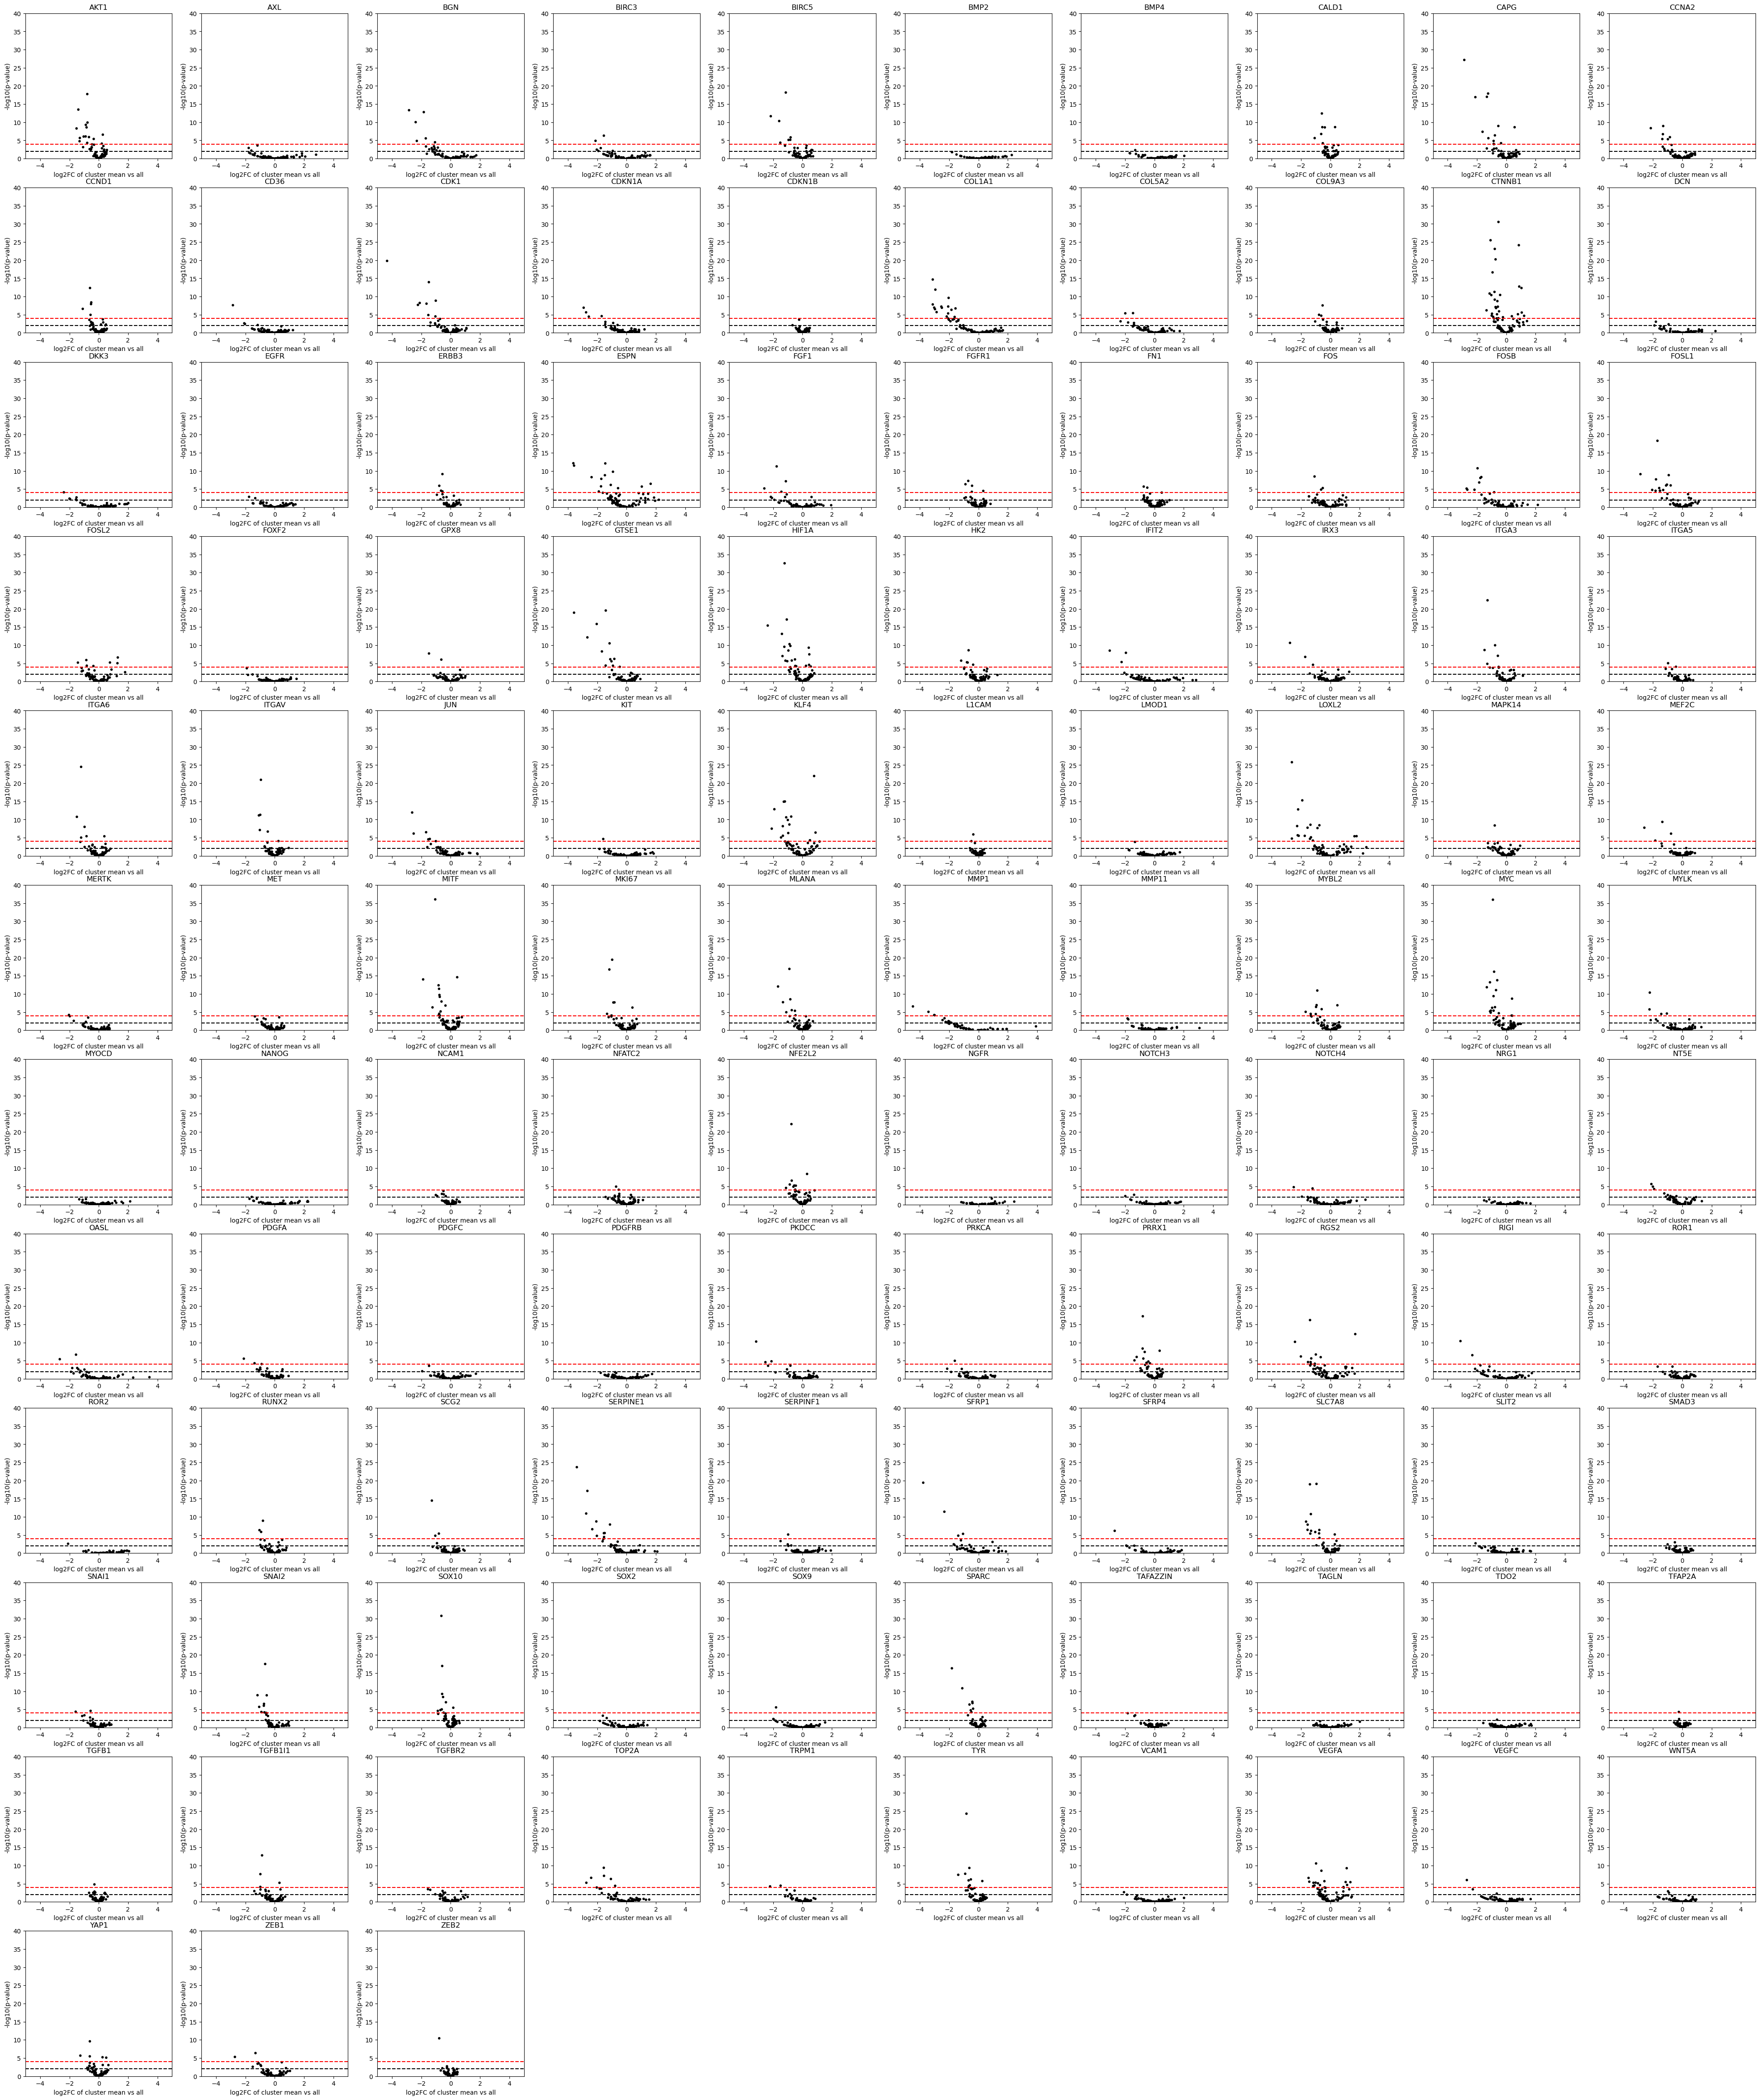

In [61]:
# for gene in 

# gene_list = ['IGFBP7','VEGFA','MITF','IFIT2','ITGA8','ROR2','SOX10','MMP1','BMP2','SFRP1']
# gene_list = ['MMP1','ENSMUSG00000071361','DCN','SFRP1','SOX10','MITF']

gene_list = adata_genes.var_names

plt.figure(figsize=(5*10,5*12))
for g,gene in enumerate(gene_list):

    
    plt.subplot(12,10,g+1)
    
    # plt.scatter(gene_by_bc_cluster_mean.loc[gene,:],-np.log10(gene_by_bc_cluster_here_p.loc[gene,:]))
    # plt.scatter(np.log2(gene_by_bc_cluster_mean.loc[gene,:]/np.mean(gene_by_bc_cluster_mean.loc[gene,:])),-np.log10(gene_by_bc_cluster_here_p.loc[gene,:]))

    colors_here = []

    for fc,p in zip(gene_by_bc_cluster_log2fc.loc[gene,:],-np.log10(gene_by_bc_cluster_here_p.loc[gene,:])):
        if fc > 2 and p > -np.log10(0.01/100):
            colors_here.append('r')
        else:
            colors_here.append('k')

    if colors_here.count('r') > 0:
        plt.title(gene,color='r')
    else:
        plt.title(gene,color='k')
        
    plt.scatter(gene_by_bc_cluster_log2fc.loc[gene,:],-np.log10(gene_by_bc_cluster_here_p.loc[gene,:]),marker='.',c=colors_here)
    plt.axhline(y=-np.log10(0.01),color='k',linestyle='--')
    plt.axhline(y=-np.log10(0.01/100),color='r',linestyle='--')
    # plt.axvline(np.mean(gene_by_bc_cluster_mean.loc[gene,:]),color='gray',linestyle='--')

    # plt.xlabel('Mean number of spots in cluster')


    plt.xlabel('log2FC of cluster mean vs all')
    plt.ylabel('-log10(p-value)')

    plt.xlim(-5,5)
    plt.ylim(0,40)

# plt.savefig('plots/clone_gene_expression_volcano.png',bbox_inches='tight',dpi=300)
# plt.yscale('log')

In [62]:

# functions = [grouped_obs_mean,grouped_obs_median,grouped_obs_sum_squares,grouped_obs_fraction,grouped_obs_fraction_quantile,grouped_obs_ttest]
# names = ['mean','median','sum_squares','fraction','fraction_90','t_statistic']

functions = [grouped_obs_mean,grouped_obs_sum_squares]
names = ['mean','sum_squares']

gene_by_bc_cluster = grouped_obs_mean(confident_clusters,'bc_cluster')

all_entropy = pd.DataFrame(index=gene_by_bc_cluster.index)
gene_by_cluster_proportion_dict = {}
gene_by_cluster_measure_dict = {}

for name,func in zip(names,functions):

    print(name,func)
    gene_by_bc_cluster_here = func(confident_clusters,'bc_cluster')
    print(gene_by_bc_cluster_here.values[:3,:3])

    gene_by_cluster_measure_dict[name] = gene_by_bc_cluster_here
    
    gene_by_bc_cluster_proportion = gene_by_bc_cluster_here.div(gene_by_bc_cluster_here.sum(axis=1,skipna=True),axis=0)
    gene_by_bc_cluster_proportion = gene_by_bc_cluster_proportion.dropna()
    gene_by_cluster_proportion_dict[name] = gene_by_bc_cluster_proportion
    
    shannon_entropy_method = -(gene_by_bc_cluster_proportion*np.log(gene_by_bc_cluster_proportion)).sum(axis=1)
    all_entropy[name] = shannon_entropy_method

all_entropy['gene'] = all_entropy.index



mean <function grouped_obs_mean at 0x574dd2f70>
[[3.71875    2.875      1.26923077]
 [0.171875   0.05       0.11538462]
 [0.859375   0.225      1.23076923]]
sum_squares <function grouped_obs_sum_squares at 0x574dd2e50>
[[27.65625    14.775       4.88461538]
 [ 0.515625    0.05        0.11538462]
 [13.453125    0.375       6.30769231]]


/Users/grantkinsler/miniforge3/envs/spatialgenomics-env2/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/grantkinsler/miniforge3/envs/spatialgenomics-env2/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [63]:
# all_entropy[all_entropy['fraction'] < all_entropy['fraction'].quantile(0.1)]

print(all_entropy['mean'].quantile(0.05))
print(all_entropy['sum_squares'].quantile(0.05))

q = 0.1

# all_entropy[(all_entropy['sum_squares'] < all_entropy['sum_squares'].quantile(q)) | 
#             (all_entropy['mean'] < all_entropy['mean'].quantile(q)) | 
#             (all_entropy['fraction'] < all_entropy['fraction'].quantile(q)) |
#             (all_entropy['fraction_90'] < all_entropy['fraction_90'].quantile(q)) |
#             (all_entropy['median'] < all_entropy['median'].quantile(q)) | 
#             (all_entropy['t_statistic'] > all_entropy['t_statistic'].quantile(1-q)) | 
#             ].sort_values('sum_squares')

# all_entropy[(all_entropy['sum_squares'] < all_entropy['sum_squares'].quantile(q)) | 
#             (all_entropy['mean'] < all_entropy['mean'].quantile(q)) | 
#             (all_entropy['fraction'] < all_entropy['fraction'].quantile(q)) |
#             (all_entropy['fraction_90'] < all_entropy['fraction_90'].quantile(q)) |
#             (all_entropy['median'] < all_entropy['median'].quantile(q)) | 
#             (all_entropy['t_statistic'] > all_entropy['t_statistic'].quantile(1-q))
#             ].sort_values('t_statistic')

all_entropy[(all_entropy['sum_squares'] < all_entropy['sum_squares'].quantile(q)) | 
            (all_entropy['mean'] < all_entropy['mean'].quantile(q)) 
            # (all_entropy['fraction'] < all_entropy['fraction'].quantile(q)) |
            # (all_entropy['fraction_90'] < all_entropy['fraction_90'].quantile(q)) |
            # (all_entropy['median'] < all_entropy['median'].quantile(q)) | 
            # (all_entropy['t_statistic'] > all_entropy['t_statistic'].quantile(1-q))
            ].sort_values('mean')


4.018560489716249
3.4589898368489074


,mean,sum_squares,gene
MMP1,3.268640,1.607533,MMP1
ROR2,3.756049,3.756049,ROR2
NGFR,3.758554,3.763997,NGFR
BMP2,3.918410,3.905170,BMP2
SFRP4,4.012571,3.993517,SFRP4
NRG1,4.013645,3.964555,NRG1
IFIT2,4.021837,2.798336,IFIT2
NANOG,4.027664,4.029608,NANOG
AXL,4.030430,3.606771,AXL
BMP4,4.079900,4.049906,BMP4


Text(0, 0.5, 'Proportion of mean expression from each cluster')

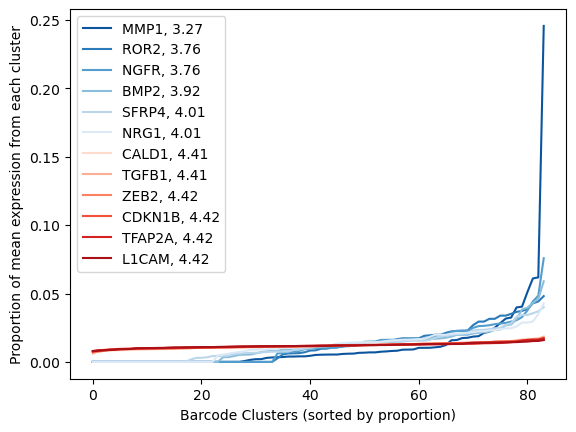

In [64]:
# gene_list = ['IGFBP7','VEGFA','MITF','IFIT2','ITGA8','ROR2','SOX10','MMP1','BMP2','SFRP1']
# gene_list = ['MMP1','ENSMUSG00000071361','DCN','SFRP1','SOX10','MITF']

how = 'mean'

# how = 'fraction_90'
# how = 'sum_squares'
# how = 'median'

gene_list = list(all_entropy[all_entropy[how] < all_entropy[how].quantile(0.05)].sort_values(how).index)

# sns.set_palette('Blues',6)
colors = sns.color_palette('Blues_r',6)

for gene in gene_list:
    plt.plot(sorted(gene_by_cluster_proportion_dict[how].loc[gene]),label=f'{gene}, {all_entropy[how][gene]:.2f}',color=colors[gene_list.index(gene)])

gene_list = list(all_entropy[all_entropy[how] > all_entropy[how].quantile(0.95)].sort_values(how).index)

# sns.set_palette('Greys',6)
colors = sns.color_palette('Reds',6)

for gene in gene_list:
    plt.plot(sorted(gene_by_cluster_proportion_dict[how].loc[gene]),label=f'{gene}, {all_entropy[how][gene]:.2f}',color=colors[gene_list.index(gene)])

plt.legend()
plt.xlabel('Barcode Clusters (sorted by proportion)')
plt.ylabel(f'Proportion of {how} expression from each cluster')


In [65]:
# shannon_entropy = all_entropy['mean']

# intrinsic_entropy = pd.DataFrame(shannon_entropy,columns=['intrinsic_entropy'])

intrinsic_entropy = all_entropy
intrinsic_entropy['intrinsic_entropy'] = all_entropy['mean']
intrinsic_entropy['gene'] = intrinsic_entropy.index
intrinsic_entropy['intrinsic_entropy_normalized'] = (intrinsic_entropy['intrinsic_entropy']-intrinsic_entropy['intrinsic_entropy'].min())/(intrinsic_entropy['intrinsic_entropy'].max()-intrinsic_entropy['intrinsic_entropy'].min())

intrinsic_entropy['intrinsic_z'] = -1*(intrinsic_entropy['intrinsic_entropy']-intrinsic_entropy['intrinsic_entropy'].median())/intrinsic_entropy['intrinsic_entropy'].std()


# ex_in_entropy = pd.merge(extrinsic_score,intrinsic_entropy[['gene','intrinsic_entropy','intrinsic_entropy_normalized']],on='gene')

In [66]:
intrinsic_entropy[intrinsic_entropy['intrinsic_z'] > 1.5].sort_values('intrinsic_z')

,mean,sum_squares,gene,intrinsic_entropy,intrinsic_entropy_normalized,intrinsic_z
BMP4,4.079900,4.049906,BMP4,4.079900,0.704175,1.567666
AXL,4.030430,3.606771,AXL,4.030430,0.661234,1.867395
NANOG,4.027664,4.029608,NANOG,4.027664,0.658833,1.884154
IFIT2,4.021837,2.798336,IFIT2,4.021837,0.653776,1.919453
NRG1,4.013645,3.964555,NRG1,4.013645,0.646665,1.969086
SFRP4,4.012571,3.993517,SFRP4,4.012571,0.645733,1.975592
BMP2,3.918410,3.905170,BMP2,3.918410,0.564001,2.546092
NGFR,3.758554,3.763997,NGFR,3.758554,0.425246,3.514610
ROR2,3.756049,3.756049,ROR2,3.756049,0.423071,3.529788
MMP1,3.268640,1.607533,MMP1,3.268640,0.000000,6.482856


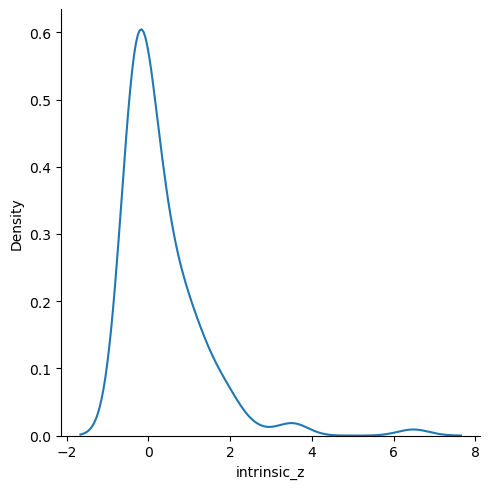

In [67]:
sns.displot(intrinsic_entropy['intrinsic_z'],kind='kde')

In [68]:
# sg_obj.gdf = sg_obj.gdf.drop(columns=['object_id'])
merged_gdf = sg_obj.gdf.merge(unclustered_df, on='cell_id', how='left')

In [69]:
sg_obj.gdf.geometry

0        POLYGON ((20366.390 1039.938, 20366.095 1040.4...
1        POLYGON ((20519.104 1049.061, 20518.026 1049.0...
2        POLYGON ((20944.036 1144.169, 20944.124 1144.2...
3        POLYGON ((20278.240 1070.077, 20277.297 1070.0...
4        POLYGON ((20771.995 1079.050, 20770.908 1079.0...
                               ...                        
79141    POLYGON ((37447.499 57833.012, 37446.517 57833...
79142    POLYGON ((38187.472 57850.056, 38186.573 57849...
79143    POLYGON ((37953.000 57866.000, 37951.868 57866...
79144    POLYGON ((38013.105 57873.456, 38005.154 57876...
79145    POLYGON ((38151.249 57899.256, 38150.331 57899...
Name: nucleus_dilated, Length: 79146, dtype: geometry

In [70]:
merged_gdf.set_geometry(sg_obj.gdf.geometry)

,object_id_x,nucleus_x,nucleus_dilated_x,cell_id,AKT1_x,AXL_x,BGN_x,BIRC3_x,BIRC5_x,BMP2_x,...,called_barcodes_y,n_called_barcodes_y,barcode_names_y,nucleus_y,nucleus_dilated_y,nucleus_centroid_y,center_x_y,center_y_y,area_y,geometry
0,1,"POLYGON ((20452.000 978.000, 20427.000 986.000...","POLYGON ((20366.390 1039.938, 20366.095 1040.4...",1,1.0,0.0,0.0,0.0,0.0,0.0,...,['bc_074'],1.0,bc_074,"POLYGON ((20452 978, 20427 986, 20404 1003, 20...",POLYGON ((20366.389794028986 1039.938002357738...,POINT (20442.225239030155 1036.1796197864292),20442.225239,1036.179620,14470.709171,"POLYGON ((20366.390 1039.938, 20366.095 1040.4..."
1,2,"POLYGON ((20518.000 1059.000, 20491.000 1068.0...","POLYGON ((20519.104 1049.061, 20518.026 1049.0...",2,0.0,1.0,3.0,0.0,2.0,0.0,...,[],0.0,NaN,"POLYGON ((20518 1059, 20491 1068, 20479 1080, ...",POLYGON ((20519.10431526075 1049.0611626532639...,POINT (20518.427127552055 1085.2613705275926),20518.427128,1085.261371,5819.142940,"POLYGON ((20519.104 1049.061, 20518.026 1049.0..."
2,3,"POLYGON ((20959.000 1068.000, 20952.000 1071.0...","POLYGON ((20944.036 1144.169, 20944.124 1144.2...",3,2.0,0.0,4.0,0.0,3.0,0.0,...,['bc_074'],1.0,bc_074,"POLYGON ((20959 1068, 20952 1071, 20937 1090, ...",POLYGON ((20944.035856838193 1144.168808503634...,POINT (20991.809975216853 1115.475051631557),20991.809975,1115.475052,11901.683819,"POLYGON ((20944.036 1144.169, 20944.124 1144.2..."
3,4,"POLYGON ((20277.000 1080.000, 20266.000 1084.0...","POLYGON ((20278.240 1070.077, 20277.297 1070.0...",4,2.0,0.0,1.0,0.0,2.0,0.0,...,[],0.0,NaN,"POLYGON ((20277 1080, 20266 1084, 20234 1089, ...",POLYGON ((20278.24034734589 1070.0772212328634...,POINT (20269.466271639365 1125.2691530149878),20269.466272,1125.269153,10573.444773,"POLYGON ((20278.240 1070.077, 20277.297 1070.0..."
4,5,"POLYGON ((20771.000 1089.000, 20758.000 1092.0...","POLYGON ((20771.995 1079.050, 20770.908 1079.0...",5,0.0,0.0,0.0,0.0,0.0,0.0,...,[],0.0,NaN,"POLYGON ((20771 1089, 20758 1092, 20754 1096, ...","POLYGON ((20771.99503719021 1079.0496280979, 2...",POINT (20773.789301397206 1115.252375249501),20773.789301,1115.252375,4064.391575,"POLYGON ((20771.995 1079.050, 20770.908 1079.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79141,79142,"POLYGON ((37447.000 57843.000, 37419.000 57850...","POLYGON ((37447.499 57833.012, 37446.517 57833...",79142,0.0,0.0,0.0,0.0,0.0,0.0,...,[],0.0,NaN,"POLYGON ((37447 57843, 37419 57850, 37407 5785...","POLYGON ((37447.49937616944 57833.01247661122,...",POINT (37438.30546113755 57867.52481305235),37438.305461,57867.524813,5319.676203,"POLYGON ((37447.499 57833.012, 37446.517 57833..."
79142,79143,"POLYGON ((38183.000 57859.000, 38176.000 57863...","POLYGON ((38187.472 57850.056, 38186.573 57849...",79143,0.0,0.0,0.0,0.0,0.0,0.0,...,[],0.0,NaN,"POLYGON ((38183 57859, 38176 57863, 38173 5787...","POLYGON ((38187.472135955 57850.05572809, 3818...",POINT (38190.32047832586 57882.49267563528),38190.320478,57882.492676,2686.901477,"POLYGON ((38187.472 57850.056, 38186.573 57849..."
79143,79144,"POLYGON ((37953.000 57876.000, 37940.000 57879...","POLYGON ((37953.000 57866.000, 37951.868 57866...",79144,0.0,0.0,0.0,0.0,2.0,0.0,...,[],0.0,NaN,"POLYGON ((37953 57876, 37940 57879, 37934 5788...","POLYGON ((37953 57866, 37951.868434617325 5786...",POINT (37964.00570594479 57901.07610138004),37964.005706,57901.076101,4686.945166,"POLYGON ((37953.000 57866.000, 37951.868 57866..."
79144,79145,"POLYGON ((38022.000 57878.000, 38021.000 57881...","POLYGON ((38013.105 57873.456, 38005.154 57876...",79145,2.0,0.0,0.0,0.0,0.0,0.0,...,['bc_006'],1.0,bc_006,"POLYGON ((38022 57878, 38021 57881, 38009 5788...","POLYGON ((38013.10545503758 57873.45606040101,...",POINT (38036.29699842022 57925.199894681406),38036.296998,57925.199895,9603.701697,"POLYGON ((38013.105 57873.456, 38005.154 57876..."


In [76]:
sg_obj.gdf

,object_id,nucleus,nucleus_dilated,cell_id,AKT1,AXL,BGN,BIRC3,BIRC5,BMP2,...,bc_cluster,bc_cluster_bc_names,bc_cluster_found_bcs,bc_cluster_n_bcs,called_barcodes,center_x,center_y,n_called_barcodes,nucleus_centroid,bc_cluster_not_nan
0,1,"POLYGON ((20452.000 978.000, 20427.000 986.000...","POLYGON ((20366.390 1039.938, 20366.095 1040.4...",1,1.0,0.0,0.0,0.0,0.0,0.0,...,690.0,bc_074,['bc_074'],1.0,['bc_074'],20442.225239,1036.179620,1.0,POINT (20442.225239030155 1036.1796197864292),690.0
1,2,"POLYGON ((20518.000 1059.000, 20491.000 1068.0...","POLYGON ((20519.104 1049.061, 20518.026 1049.0...",2,0.0,1.0,3.0,0.0,2.0,0.0,...,NaN,NaN,NaN,NaN,[],20518.427128,1085.261371,0.0,POINT (20518.427127552055 1085.2613705275926),9999999.0
2,3,"POLYGON ((20959.000 1068.000, 20952.000 1071.0...","POLYGON ((20944.036 1144.169, 20944.124 1144.2...",3,2.0,0.0,4.0,0.0,3.0,0.0,...,NaN,NaN,NaN,NaN,['bc_074'],20991.809975,1115.475052,1.0,POINT (20991.809975216853 1115.475051631557),9999999.0
3,4,"POLYGON ((20277.000 1080.000, 20266.000 1084.0...","POLYGON ((20278.240 1070.077, 20277.297 1070.0...",4,2.0,0.0,1.0,0.0,2.0,0.0,...,NaN,NaN,NaN,NaN,[],20269.466272,1125.269153,0.0,POINT (20269.466271639365 1125.2691530149878),9999999.0
4,5,"POLYGON ((20771.000 1089.000, 20758.000 1092.0...","POLYGON ((20771.995 1079.050, 20770.908 1079.0...",5,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,[],20773.789301,1115.252375,0.0,POINT (20773.789301397206 1115.252375249501),9999999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79141,79142,"POLYGON ((37447.000 57843.000, 37419.000 57850...","POLYGON ((37447.499 57833.012, 37446.517 57833...",79142,0.0,0.0,0.0,0.0,0.0,0.0,...,1775.0,NaN,[],0.0,[],37438.305461,57867.524813,0.0,POINT (37438.30546113755 57867.52481305235),1775.0
79142,79143,"POLYGON ((38183.000 57859.000, 38176.000 57863...","POLYGON ((38187.472 57850.056, 38186.573 57849...",79143,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,[],38190.320478,57882.492676,0.0,POINT (38190.32047832586 57882.49267563528),9999999.0
79143,79144,"POLYGON ((37953.000 57876.000, 37940.000 57879...","POLYGON ((37953.000 57866.000, 37951.868 57866...",79144,0.0,0.0,0.0,0.0,2.0,0.0,...,2199.0,NaN,[],0.0,[],37964.005706,57901.076101,0.0,POINT (37964.00570594479 57901.07610138004),2199.0
79144,79145,"POLYGON ((38022.000 57878.000, 38021.000 57881...","POLYGON ((38013.105 57873.456, 38005.154 57876...",79145,2.0,0.0,0.0,0.0,0.0,0.0,...,1814.0,bc_006,['bc_006'],1.0,['bc_006'],38036.296998,57925.199895,1.0,POINT (38036.29699842022 57925.199894681406),1814.0


In [71]:
merged_gdf = gpd.GeoDataFrame(merged_gdf,geometry=sg_obj.gdf.geometry)

In [75]:
merged_gdf

,object_id_x,nucleus_x,nucleus_dilated_x,cell_id,AKT1_x,AXL_x,BGN_x,BIRC3_x,BIRC5_x,BMP2_x,...,called_barcodes_y,n_called_barcodes_y,barcode_names_y,nucleus_y,nucleus_dilated_y,nucleus_centroid_y,center_x_y,center_y_y,area_y,geometry
0,1,"POLYGON ((20452.000 978.000, 20427.000 986.000...","POLYGON ((20366.390 1039.938, 20366.095 1040.4...",1,1.0,0.0,0.0,0.0,0.0,0.0,...,['bc_074'],1.0,bc_074,"POLYGON ((20452 978, 20427 986, 20404 1003, 20...",POLYGON ((20366.389794028986 1039.938002357738...,POINT (20442.225239030155 1036.1796197864292),20442.225239,1036.179620,14470.709171,"POLYGON ((20366.390 1039.938, 20366.095 1040.4..."
1,2,"POLYGON ((20518.000 1059.000, 20491.000 1068.0...","POLYGON ((20519.104 1049.061, 20518.026 1049.0...",2,0.0,1.0,3.0,0.0,2.0,0.0,...,[],0.0,NaN,"POLYGON ((20518 1059, 20491 1068, 20479 1080, ...",POLYGON ((20519.10431526075 1049.0611626532639...,POINT (20518.427127552055 1085.2613705275926),20518.427128,1085.261371,5819.142940,"POLYGON ((20519.104 1049.061, 20518.026 1049.0..."
2,3,"POLYGON ((20959.000 1068.000, 20952.000 1071.0...","POLYGON ((20944.036 1144.169, 20944.124 1144.2...",3,2.0,0.0,4.0,0.0,3.0,0.0,...,['bc_074'],1.0,bc_074,"POLYGON ((20959 1068, 20952 1071, 20937 1090, ...",POLYGON ((20944.035856838193 1144.168808503634...,POINT (20991.809975216853 1115.475051631557),20991.809975,1115.475052,11901.683819,"POLYGON ((20944.036 1144.169, 20944.124 1144.2..."
3,4,"POLYGON ((20277.000 1080.000, 20266.000 1084.0...","POLYGON ((20278.240 1070.077, 20277.297 1070.0...",4,2.0,0.0,1.0,0.0,2.0,0.0,...,[],0.0,NaN,"POLYGON ((20277 1080, 20266 1084, 20234 1089, ...",POLYGON ((20278.24034734589 1070.0772212328634...,POINT (20269.466271639365 1125.2691530149878),20269.466272,1125.269153,10573.444773,"POLYGON ((20278.240 1070.077, 20277.297 1070.0..."
4,5,"POLYGON ((20771.000 1089.000, 20758.000 1092.0...","POLYGON ((20771.995 1079.050, 20770.908 1079.0...",5,0.0,0.0,0.0,0.0,0.0,0.0,...,[],0.0,NaN,"POLYGON ((20771 1089, 20758 1092, 20754 1096, ...","POLYGON ((20771.99503719021 1079.0496280979, 2...",POINT (20773.789301397206 1115.252375249501),20773.789301,1115.252375,4064.391575,"POLYGON ((20771.995 1079.050, 20770.908 1079.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79141,79142,"POLYGON ((37447.000 57843.000, 37419.000 57850...","POLYGON ((37447.499 57833.012, 37446.517 57833...",79142,0.0,0.0,0.0,0.0,0.0,0.0,...,[],0.0,NaN,"POLYGON ((37447 57843, 37419 57850, 37407 5785...","POLYGON ((37447.49937616944 57833.01247661122,...",POINT (37438.30546113755 57867.52481305235),37438.305461,57867.524813,5319.676203,"POLYGON ((37447.499 57833.012, 37446.517 57833..."
79142,79143,"POLYGON ((38183.000 57859.000, 38176.000 57863...","POLYGON ((38187.472 57850.056, 38186.573 57849...",79143,0.0,0.0,0.0,0.0,0.0,0.0,...,[],0.0,NaN,"POLYGON ((38183 57859, 38176 57863, 38173 5787...","POLYGON ((38187.472135955 57850.05572809, 3818...",POINT (38190.32047832586 57882.49267563528),38190.320478,57882.492676,2686.901477,"POLYGON ((38187.472 57850.056, 38186.573 57849..."
79143,79144,"POLYGON ((37953.000 57876.000, 37940.000 57879...","POLYGON ((37953.000 57866.000, 37951.868 57866...",79144,0.0,0.0,0.0,0.0,2.0,0.0,...,[],0.0,NaN,"POLYGON ((37953 57876, 37940 57879, 37934 5788...","POLYGON ((37953 57866, 37951.868434617325 5786...",POINT (37964.00570594479 57901.07610138004),37964.005706,57901.076101,4686.945166,"POLYGON ((37953.000 57866.000, 37951.868 57866..."
79144,79145,"POLYGON ((38022.000 57878.000, 38021.000 57881...","POLYGON ((38013.105 57873.456, 38005.154 57876...",79145,2.0,0.0,0.0,0.0,0.0,0.0,...,['bc_006'],1.0,bc_006,"POLYGON ((38022 57878, 38021 57881, 38009 5788...","POLYGON ((38013.10545503758 57873.45606040101,...",POINT (38036.29699842022 57925.199894681406),38036.296998,57925.199895,9603.701697,"POLYGON ((38013.105 57873.456, 38005.154 57876..."


<AxesSubplot: >

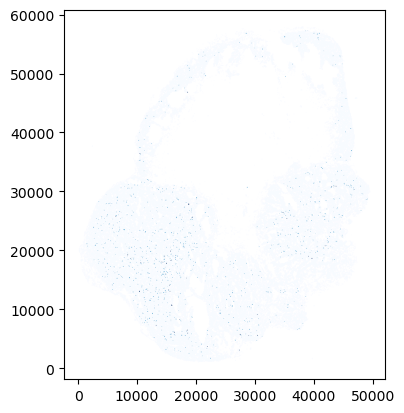

In [78]:
sg_obj.gdf.plot('NGFR',vmin=0,vmax=2,cmap='Blues')

<AxesSubplot: >

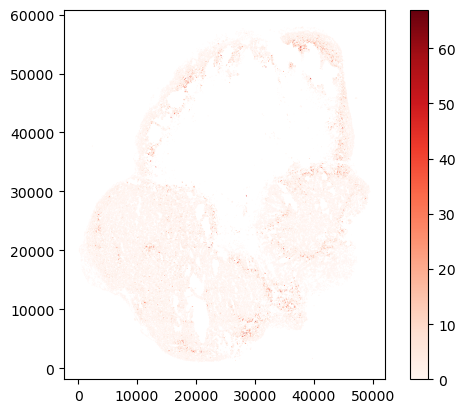

In [77]:
sg_obj.gdf.plot('VEGFA',cmap='Reds',legend=True,facecolor='gray')

<AxesSubplot: >

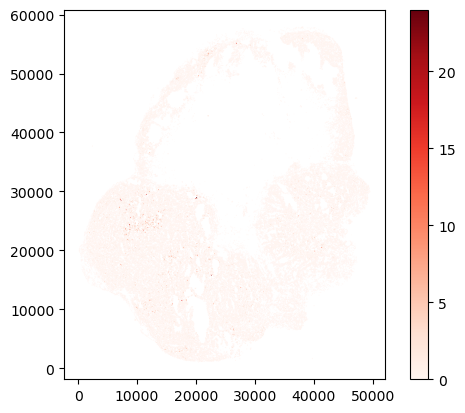

In [80]:
sg_obj.gdf.plot('SFRP1',cmap='Reds',legend=True,facecolor='gray')

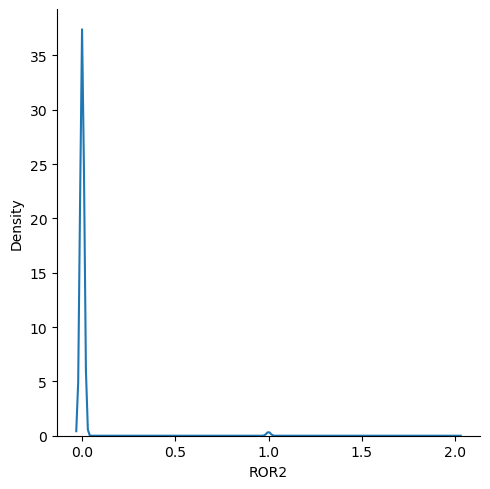

In [119]:
sns.displot(merged_gdf['ROR2'],kind='kde')

506.0     0.042104
120.0     0.034990
495.0     0.030408
1202.0    0.029667
975.0     0.029629
            ...   
234.0     0.003686
1388.0    0.003577
183.0     0.002295
450.0     0.000845
28.0      0.000000
Name: SFRP1, Length: 84, dtype: float64
506 65 [22979, 30379, 30656, 31326, 31328, 38730, 38844, 38926, 39199, 39265, 39367, 39975, 40197, 40441, 40485, 40592, 4067, 4070, 40864, 40924, 40966, 41074, 41302, 4147, 41799, 42052, 42334, 42343, 4238, 42404, 42537, 42606, 43076, 43121, 43221, 43826, 44324, 45559, 45908, 46048, 47345, 48398, 48399, 48641, 54132, 54438, 55083, 55478, 55680, 56106, 5628, 56321, 56703, 56837, 56910, 57892, 5996, 60062, 60181, 603, 60746, 60825, 62955, 63207, 66311]
[' ' "'" ',' '0' '1' '2' '3' '4' '6' '7' '8' '9' '[' ']' '_' 'b' 'c']
VRange 0 10
(0, 226)
120 193 [14159, 14771, 1546, 38131, 3842, 40249, 40286, 40426, 4054, 41050, 42754, 43748, 44370, 45810, 46149, 46180, 46551, 46655, 46768, 46846, 47241, 47442, 48539, 48649, 49036, 49262, 49300, 49491, 496

/Users/grantkinsler/miniforge3/envs/spatialgenomics-env2/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


VRange 0 10
(0, 226)
495 55 [54984, 55076, 55297, 55332, 55346, 55391, 55412, 55454, 55591, 55612, 55635, 5565, 55658, 55770, 55829, 55830, 55833, 55915, 5593, 55953, 55964, 55988, 56034, 56047, 56074, 56109, 56192, 56234, 56247, 56282, 56326, 56364, 56428, 56451, 56474, 56540, 56571, 56599, 56617, 56729, 56830, 56849, 56860, 56921, 56950, 56969, 56983, 57027, 57042, 57125, 5716, 57192, 57236, 57567, 57896]
[' ' "'" ',' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '[' ']' '_' 'b' 'c']


/Users/grantkinsler/miniforge3/envs/spatialgenomics-env2/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


VRange 0 10
(0, 226)


/Users/grantkinsler/miniforge3/envs/spatialgenomics-env2/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


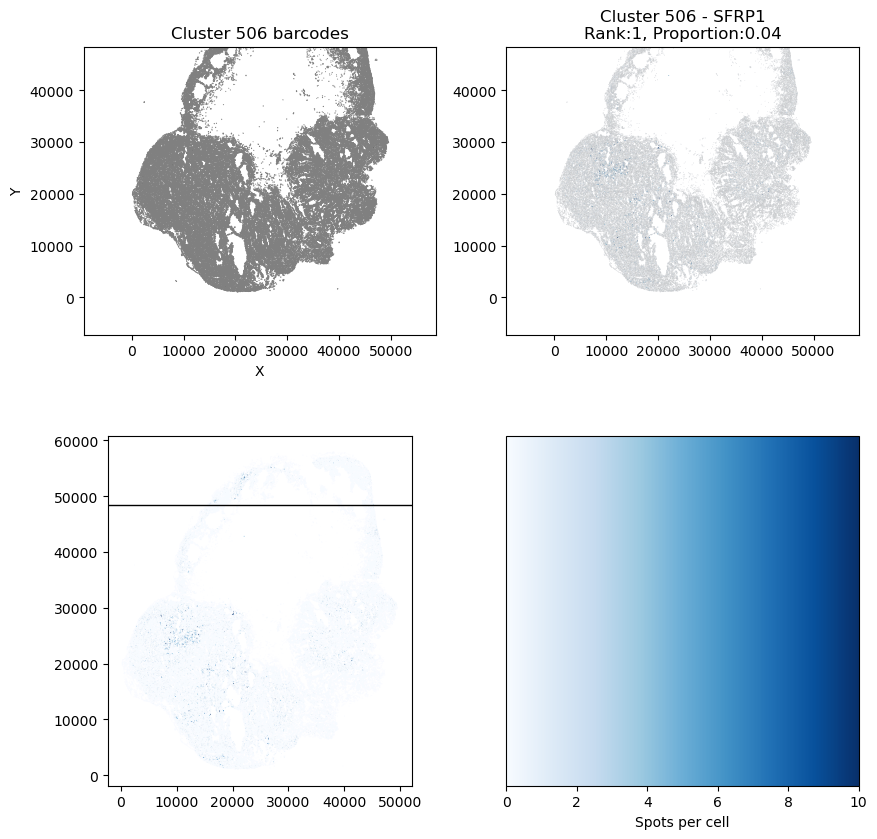

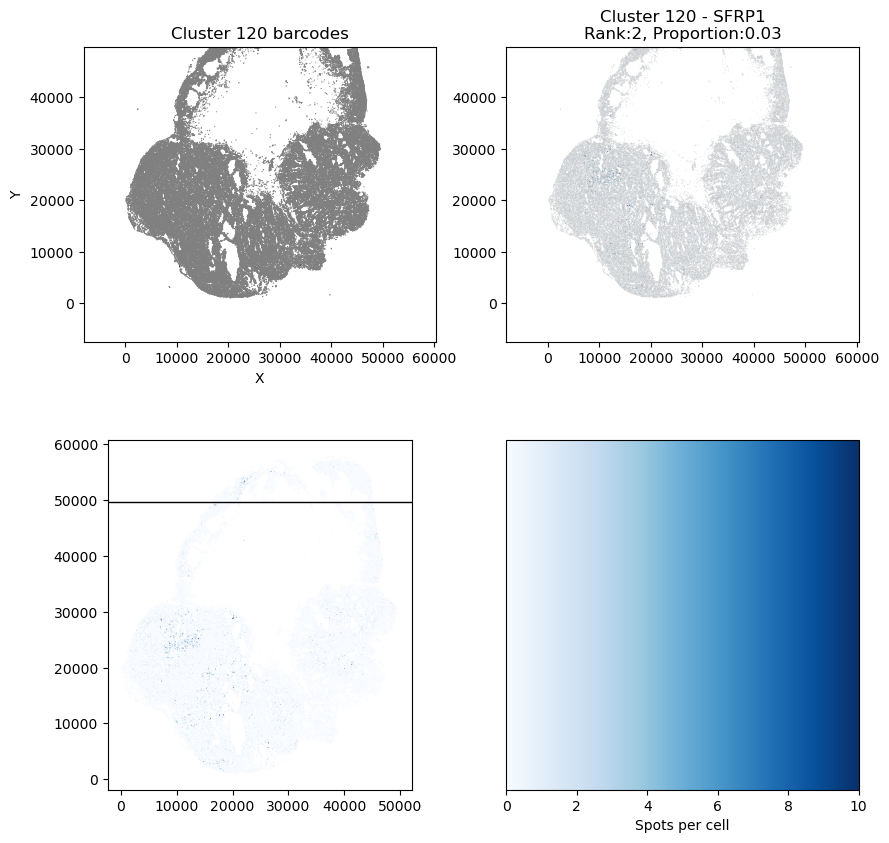

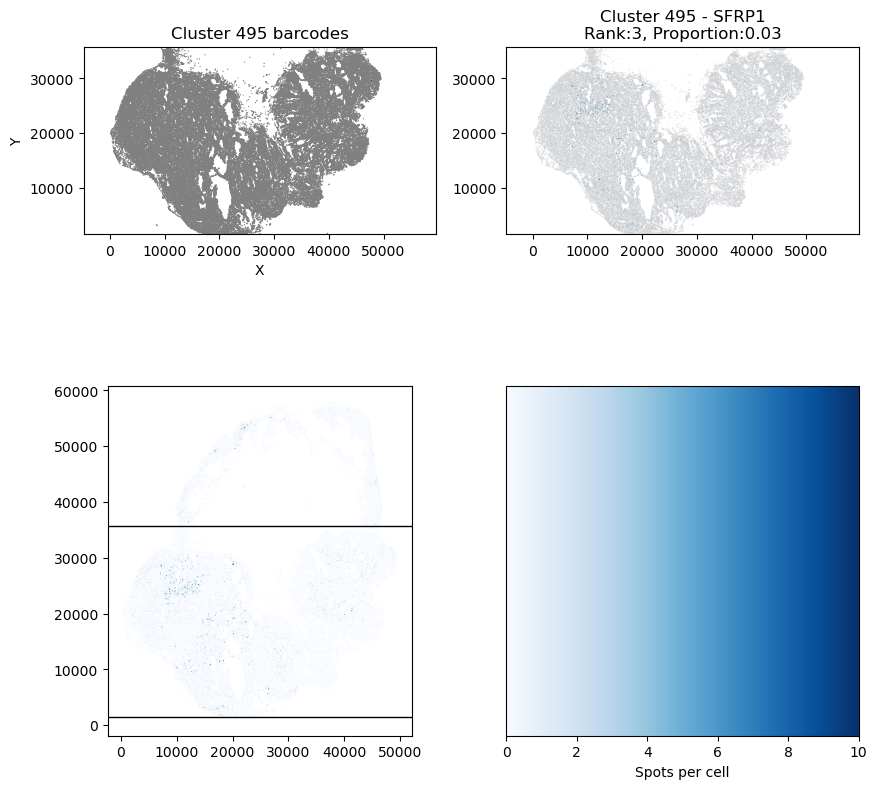

In [116]:
# gene_of_interest = 'FOSB'
# gene_of_interest = 'IGFBP7'
gene_of_interest = 'SFRP1'
# gene_of_interest = 'ROR2'
how = 'mean'

print((gene_by_cluster_proportion_dict[how].loc[gene_of_interest ]).sort_values(ascending=False))
# clusters_of_interest = [int(x) for x in (gene_by_bc_cluster_proportion.loc[gene_of_interest ])[gene_by_bc_cluster_proportion.loc[gene_of_interest ] > 0.05].index]

top_to_plot = 3
threshold = 0.02

props = (gene_by_cluster_proportion_dict[how].loc[gene_of_interest ]).sort_values(ascending=False).values

top_to_plot = min([sum(props>threshold),top_to_plot])

clusters_of_interest = [int(x) for x in (gene_by_cluster_proportion_dict[how].loc[gene_of_interest ]).sort_values(ascending=False).index[:top_to_plot]]
proportions_of_interest = (gene_by_cluster_proportion_dict[how].loc[gene_of_interest ]).sort_values(ascending=False).values[:top_to_plot]

for rank,(cluster_of_interest,proportion) in enumerate(zip(clusters_of_interest,proportions_of_interest)): 

    cluster_cells = list(adata_genes[adata_genes.obs['bc_cluster']==cluster_of_interest].obs['cell_id'].values)
    print(cluster_of_interest,len(cluster_cells),cluster_cells)

    central_ix = int(len(cluster_cells)/2)

    cell_id = cluster_cells[central_ix]

    region = tools.get_polygons_around_polygon(sg_obj,cell_id,image_scale=5,id_field='cell_id')

    sg_obj.gdf['object_id'] = sg_obj.gdf.index

    gene_names = tools.get_all_barcodes_in_region(df,region['cell_id'].values,id_field='cell_id')

    print(np.unique(gene_names))

    fig = plt.figure(figsize=(10,10))

    vmin = 0
    # vmax = max([cell_gene_table_df[gene_of_interest].quantile(0.99),5])
    vmax = max([df[gene_of_interest].quantile(0.99),10])

    ax = fig.add_subplot(221)
    tools.plot_polygons_and_points(sg_obj,cluster_cells,gene_names=gene_names,central_polygon_ix=central_ix,
                                annotate=False,image_scale=0.5,label=f'in cluster {clusters_of_interest[0]}',
                                focal_outline_color='k',other_outline_color='gray',
                                interior_marker='.',single_mode=False,lw=0.5,
                                exterior_marker='.',marker_size=2,ax=ax)

    plt.title(f'Cluster {cluster_of_interest} barcodes')

    ymin,ymax = plt.ylim()
    xmin,xmax = plt.xlim()

    ax = fig.add_subplot(223)

    sg_obj.gdf.plot(column=gene_of_interest, cmap='Blues', legend=False,vmin=vmin,vmax=vmax,ax=ax)

    rect = matplotlib.patches.Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), linewidth=1, edgecolor='k', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    ax = fig.add_subplot(224)

    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)

# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.  There are many more kwargs, but the
# following gives a basic continuous colorbar with ticks
# and labels.
    cb1 = matplotlib.colorbar.ColorbarBase(ax, cmap='Blues',
                                norm=norm,
                                orientation='horizontal')
    cb1.set_label('Spots per cell')
    
    ax = fig.add_subplot(222)

    gene_names = [gene_of_interest]

    # gene_names = df[df['cell_id']==cell_id]['called_barcodes'].values[0] + df[df['cell_id']=='60']['called_barcodes'].values[0]

    # tools.plot_polygons_and_points(sg_obj,cluster_cells,gene_names=gene_names,central_polygon_ix=central_ix,
    #                             annotate=False,image_scale=0.5,label=f'in cluster {clusters_of_interest[0]}',
    #                             focal_outline_color='r',other_outline_color='gray',
    #                             interior_marker='.',single_mode=False,lw=0.5,
    #                             exterior_marker='.',marker_size=2,ax=ax)

    plt.title(f'Cluster {cluster_of_interest} - {gene_of_interest}\nRank:{rank+1}, Proportion:{proportion:.2f}')

    # vmin = 0
    # vmax = max([cell_gene_table_df[gene_of_interest].quantile(0.99),5])
    # vmax = max([cell_gene_table_df[gene_of_interest].quantile(0.99),10])
    print('VRange',vmin,vmax)

    # other_clusters = adata_genes[~adata_genes.obs['bc_cluster'].isin(clusters_of_interest)]

    bbox = box(xmin,ymin,xmax,ymax)

    other_clusters = sg_obj.gdf[sg_obj.gdf.geometry.intersects(bbox) & (~sg_obj.gdf['cell_id'].isin(cluster_cells))]

    # sg_obj.gdf = sg_obj.gdf.drop(columns=['object_id'])

    merged_gdf_other = sg_obj.gdf[sg_obj.gdf['cell_id'].isin(other_clusters.index)]

    # print(merged_gdf_focal.shape)

    merged_gdf_other.plot(column=gene_of_interest, cmap='Blues', legend=False, ax=ax,
                    vmin=vmin,vmax=vmax,edgecolor='gray',linewidth=0.05)

    this_cluster = adata_genes[adata_genes.obs['bc_cluster']==cluster_of_interest]

    merged_gdf_focal = sg_obj.gdf[sg_obj.gdf['cell_id'].isin(this_cluster.obs.index)]
    
    print(merged_gdf_focal.shape)
    merged_gdf_focal.plot(column=gene_of_interest, cmap='Blues', legend=False, ax=ax,
                    vmin=vmin,vmax=vmax,edgecolor='r',linewidth=0.5)

    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)

    # plt.savefig(f'plots/cluster_intrinsic_expression_{how}_{gene_of_interest}_{cluster_of_interest}.pdf',bbox_inches='tight')
    # sg_obj_only_bcs.plot_polygon_and_points(mapping_dict[cell_id],gene_names=gene_names,annotate=False)

<AxesSubplot: title={'center': 'Polygons in cluster 120 and Surrounding Area'}, xlabel='X', ylabel='Y'>

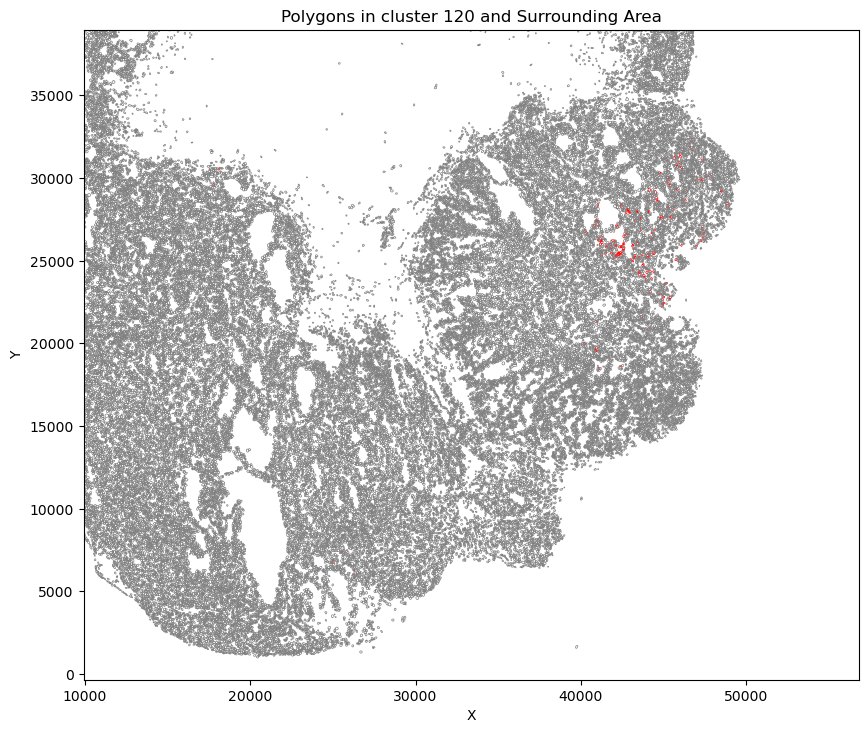

In [22]:
clusters_of_interest = [120]

cluster_cells = list(sg_obj.gdf[sg_obj.gdf['bc_cluster']==120]['cell_id'].values)


central_ix = int(len(cluster_cells)/2)

cell_id = cluster_cells[central_ix]

region = tools.get_polygons_around_polygon(sg_obj,cell_id,image_scale=25,id_field='cell_id')

fig,ax = plt.subplots(figsize=(10,10))

gene_names = tools.get_all_barcodes_in_region(df,region['cell_id'].values,id_field='cell_id')


tools.plot_polygons_and_points(sg_obj,cluster_cells,gene_names=gene_names,central_polygon_ix=central_ix,
                                annotate=False,image_scale=0.5,label=f'in cluster {clusters_of_interest[0]}',
                                focal_outline_color='r',other_outline_color='gray',
                                interior_marker='.',single_mode=False,lw=0.5,
                                exterior_marker='.',marker_size=2,ax=ax)


In [124]:
adata_genes[adata_genes.obs['bc_cluster']==120].obs

,cell_id,n_called_barcodes,barcode_names,called_barcodes,area,center_x,center_y,bc_cluster,bc_cluster_n_bcs,bc_cluster_found_bcs,bc_cluster_bc_names,n_genes
4591,14159,3,bc_001-bc_022-bc_027,"['bc_001', 'bc_022', 'bc_027']",16312.990306,28858.002934,12483.650391,120.0,2.0,"['bc_001', 'bc_027']",bc_001-bc_027,40
5254,14771,2,bc_085-bc_096,"['bc_085', 'bc_096']",3748.638951,34724.750203,12808.623636,120.0,2.0,"['bc_085', 'bc_096']",bc_085-bc_096,25
5995,1546,1,bc_085,['bc_085'],11183.135039,21801.301359,3337.119198,120.0,NaN,NaN,NaN,19
29129,38131,1,bc_050,['bc_050'],13417.611406,13080.451137,21587.388132,120.0,1.0,['bc_050'],bc_050,45
29441,3842,5,bc_029-bc_059-bc_064-bc_068-bc_085,"['bc_029', 'bc_059', 'bc_064', 'bc_068', 'bc_0...",7679.461423,20178.470665,5785.393496,120.0,6.0,"['bc_029', 'bc_059', 'bc_064', 'bc_068', 'bc_0...",bc_029-bc_059-bc_064-bc_068-bc_080-bc_085,35
...,...,...,...,...,...,...,...,...,...,...,...,...
58690,6544,3,bc_024-bc_048-bc_060,"['bc_024', 'bc_048', 'bc_060']",8297.706869,18963.281525,7885.379965,120.0,2.0,"['bc_048', 'bc_060']",bc_048-bc_060,23
59064,6584,4,bc_013-bc_041-bc_079-bc_085,"['bc_013', 'bc_041', 'bc_079', 'bc_085']",5438.121151,15658.576412,7893.404485,120.0,4.0,"['bc_013', 'bc_041', 'bc_079', 'bc_085']",bc_013-bc_041-bc_079-bc_085,41
59342,66119,4,bc_033-bc_039-bc_057-bc_067,"['bc_033', 'bc_039', 'bc_057', 'bc_067']",12114.427820,11419.294405,38630.776667,120.0,3.0,"['bc_033', 'bc_039', 'bc_067']",bc_033-bc_039-bc_067,31
59706,66513,2,bc_033-bc_039,"['bc_033', 'bc_039']",8216.938321,10184.787222,39351.166617,120.0,3.0,"['bc_033', 'bc_039', 'bc_067']",bc_033-bc_039-bc_067,35


In [125]:
clustered_df[clustered_df['bc_cluster']==120]

,object_id,cell_id,n_called_barcodes,barcode_names,called_barcodes,area,center_x,center_y,bc_cluster,bc_cluster_n_bcs,bc_cluster_found_bcs,bc_cluster_bc_names
35474,4389,4389,2,bc_074-bc_095,"['bc_074', 'bc_095']",4417.673626,26290.922806,6250.218312,120.0,2.0,"['bc_074', 'bc_095']",bc_074-bc_095
42234,5010,5010,4,bc_025-bc_074-bc_093-bc_095,"['bc_025', 'bc_074', 'bc_093', 'bc_095']",11399.124990,25010.809155,6824.607138,120.0,2.0,"['bc_074', 'bc_095']",bc_074-bc_095
50394,5774,5774,3,bc_074-bc_093-bc_095,"['bc_074', 'bc_093', 'bc_095']",7295.867712,25542.836985,7406.372883,120.0,2.0,"['bc_074', 'bc_095']",bc_074-bc_095
20328,29704,29704,2,bc_074-bc_095,"['bc_074', 'bc_095']",10490.311726,41098.110239,18484.684506,120.0,2.0,"['bc_074', 'bc_095']",bc_074-bc_095
20758,30107,30107,2,bc_074-bc_095,"['bc_074', 'bc_095']",7473.920849,42436.437374,18605.895009,120.0,2.0,"['bc_074', 'bc_095']",bc_074-bc_095
...,...,...,...,...,...,...,...,...,...,...,...,...
53698,60757,60757,4,bc_001-bc_027-bc_074-bc_095,"['bc_001', 'bc_027', 'bc_074', 'bc_095']",13146.470466,46010.782698,31453.390161,120.0,2.0,"['bc_074', 'bc_095']",bc_074-bc_095
54107,61128,61128,3,bc_060-bc_074-bc_095,"['bc_060', 'bc_074', 'bc_095']",4400.975394,46719.235429,31661.472554,120.0,2.0,"['bc_074', 'bc_095']",bc_074-bc_095
54381,61377,61377,3,bc_060-bc_074-bc_095,"['bc_060', 'bc_074', 'bc_095']",6492.733211,46604.730178,31881.261933,120.0,2.0,"['bc_074', 'bc_095']",bc_074-bc_095
54735,61698,61698,3,bc_060-bc_074-bc_095,"['bc_060', 'bc_074', 'bc_095']",7892.541152,46755.177155,32148.815038,120.0,2.0,"['bc_074', 'bc_095']",bc_074-bc_095


In [112]:
gene_by_cluster_proportion_dict['mean'].loc['SFRP1'].sort_values(ascending=False)

506.0     0.042104
120.0     0.034990
495.0     0.030408
1202.0    0.029667
975.0     0.029629
            ...   
234.0     0.003686
1388.0    0.003577
183.0     0.002295
450.0     0.000845
28.0      0.000000
Name: SFRP1, Length: 84, dtype: float64

In [85]:
cluster_cells

[14159,
 14771,
 1546,
 38131,
 3842,
 40249,
 40286,
 40426,
 4054,
 41050,
 42754,
 43748,
 44370,
 45810,
 46149,
 46180,
 46551,
 46655,
 46768,
 46846,
 47241,
 47442,
 48539,
 48649,
 49036,
 49262,
 49300,
 49491,
 4961,
 49689,
 50068,
 5012,
 50144,
 50248,
 50262,
 50407,
 50840,
 51092,
 5129,
 51715,
 51752,
 51929,
 51955,
 52108,
 52194,
 52203,
 52254,
 52304,
 52358,
 52361,
 5239,
 52464,
 52518,
 52534,
 52567,
 52604,
 52650,
 5271,
 52733,
 52781,
 52782,
 52847,
 52863,
 52872,
 52885,
 52896,
 52917,
 5292,
 53011,
 53284,
 53340,
 53348,
 53416,
 5350,
 53563,
 53640,
 53779,
 53787,
 53821,
 53832,
 53895,
 53945,
 53955,
 53965,
 54039,
 54082,
 541,
 5413,
 54160,
 54169,
 54186,
 54216,
 54367,
 54483,
 54573,
 54589,
 54616,
 5462,
 54663,
 54741,
 5476,
 54788,
 54846,
 5490,
 5494,
 55107,
 55450,
 55480,
 55503,
 55621,
 55654,
 55695,
 55994,
 56054,
 56071,
 56085,
 56229,
 56325,
 56476,
 56520,
 56568,
 56995,
 5703,
 57055,
 57155,
 57301,
 5732,
 57

In [87]:
import 

AttributeError: module 'tools' has no attribute 'get_all_barcodes_in_region'

In [105]:
from tools import get_polygons_around_polygon

ImportError: cannot import name 'get_polygons_around_polygon' from 'tools' (unknown location)

In [106]:
tools2.get_polygons_around_polygon(sg_obj,cell_id,image_scale=25,id_field='cell_id')

AttributeError: module 'tools' has no attribute 'get_polygons_around_polygon'

In [107]:
from importlib import reload

In [108]:
reload(tools)

<module 'tools' from '/Users/grantkinsler/Documents/Penn/Research/SpatialBarcodes/analysis/tools/tools.py'>

In [ ]:
tools.get_pol